# Bike Sharing Prediction

In [122]:
#importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [123]:
#export data file 

bike_data=pd.read_csv("day.csv",index_col=0)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Cleaning and Preparation

In [124]:
bike_data.shape

(730, 15)

In [125]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 88.4+ KB


In [126]:
#check null values
#no null values

bike_data.isnull().sum()   

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [127]:
# convert dteday to datetime formate

bike_data['dteday']=pd.to_datetime(bike_data['dteday'])
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.2 KB


In [128]:
bike_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

### Converting numeric columns into categorical columns 

In [129]:
#convert season column into categorical

#cheking values in the season column
bike_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [130]:
# each number represent a season, 
# replacing the numeric values to their respective season 
# 1-spring; 2-summer; 3- fall; 4-winter

bike_data.loc[(bike_data['season']==1),'season']='spring'
bike_data.loc[(bike_data['season']==2),'season']='summer'
bike_data.loc[(bike_data['season']==3),'season']='fall'
bike_data.loc[(bike_data['season']==4),'season']='winter'

In [131]:
bike_data['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [132]:
bike_data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [133]:
#converting month numeric column into categorical using fuction

def month_name(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',11:'Nov',12:'Dec'})

bike_data[['mnth']]= bike_data[['mnth']].apply(month_name)

In [134]:
bike_data['mnth'].value_counts()

Aug    62
Mar    62
Jul    62
May    62
Dec    62
Oct    62
Jan    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [135]:
bike_data['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [136]:
bike_data['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [137]:
#converting weekday numeeric values to category column using function 
# 0-Tue, 1-Wed, 2-Thur, 3-Fri, 4-Sat, 5-Sun, 6-Mon

def week_day(x):
    return x.map ({0:'Tue', 1:'Wed', 2:'Thur', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon'})

bike_data[['weekday']]= bike_data[['weekday']].apply(week_day)

In [138]:
bike_data['weekday'].value_counts()

Mon     105
Tue     105
Wed     105
Sat     104
Thur    104
Sun     104
Fri     103
Name: weekday, dtype: int64

In [139]:
#converting weathersit to categorical column

bike_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [140]:
# replacing weathersit data with Alphabets 

bike_data['weathersit']=bike_data['weathersit'].replace(1, 'A')
bike_data['weathersit']=bike_data['weathersit'].replace(2, 'B')
bike_data['weathersit']=bike_data['weathersit'].replace(3, 'C')

In [141]:
bike_data['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

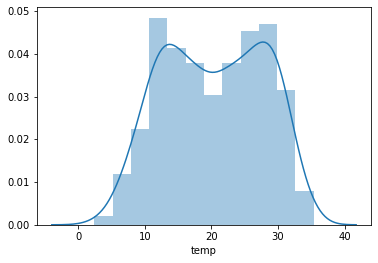

In [142]:
#Skewness

sns.distplot(bike_data['temp'])

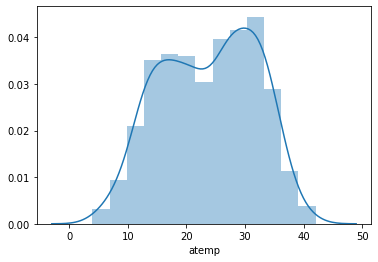

In [143]:
sns.distplot(bike_data['atemp'])

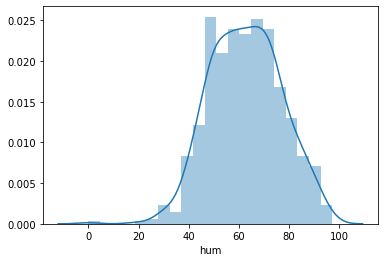

In [144]:
sns.distplot(bike_data['hum'])

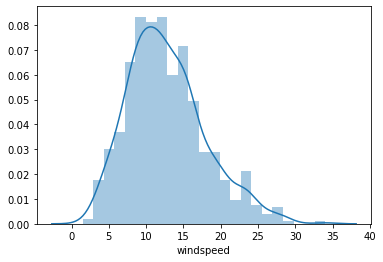

In [145]:
sns.distplot(bike_data['windspeed'])

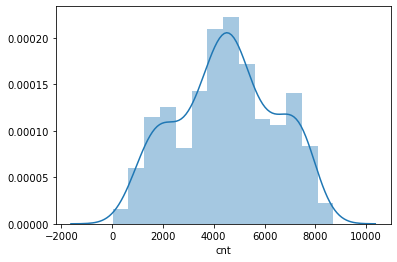

In [146]:
sns.distplot(bike_data['cnt'])

In [147]:
# to select categorical columns

cat_data =bike_data.select_dtypes('object')

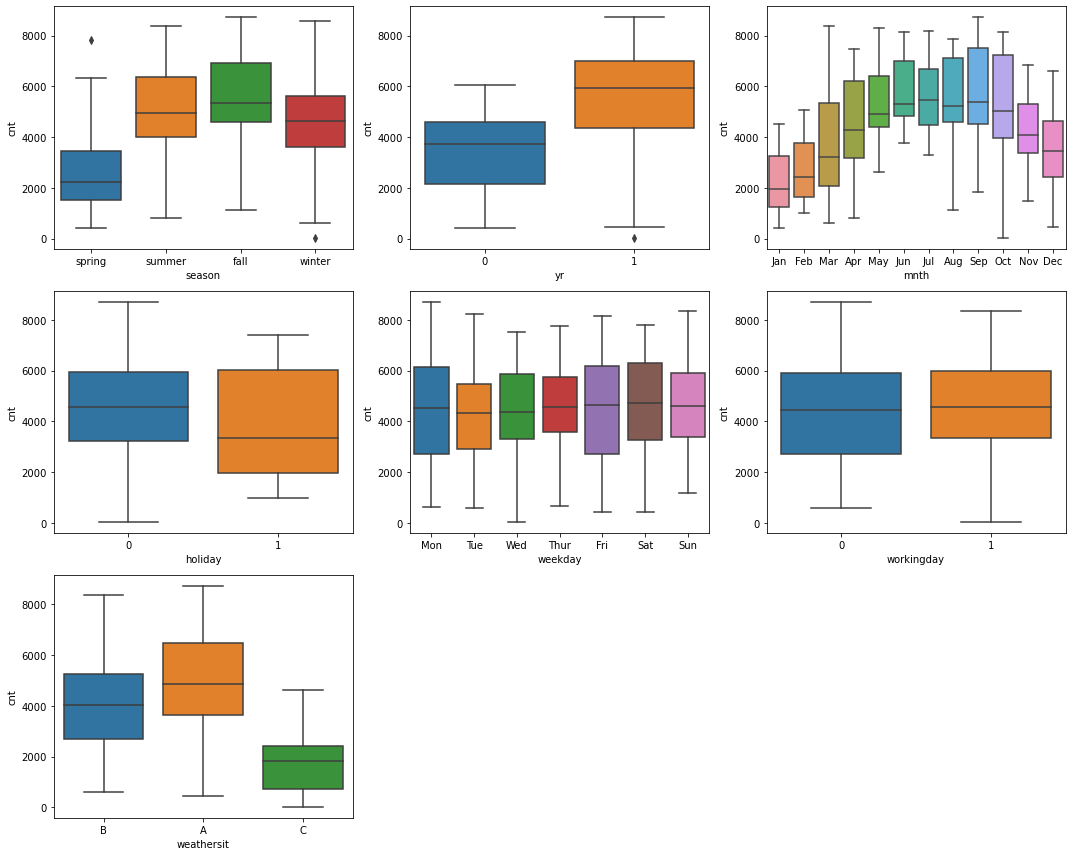

In [148]:
#box plot representing count of bike rent for years

plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt',data= bike_data)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt',data= bike_data)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt',data= bike_data)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt',data= bike_data)

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt',data= bike_data)

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt',data= bike_data)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt',data= bike_data)
plt.tight_layout()


In [149]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 95.8+ 

In [150]:
#select numeric columns

num_data = bike_data.select_dtypes(include=['float64','int64'])
num_data.drop(['yr','holiday','workingday'],axis=1,inplace =True)
num_data.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,
1,14.110847,18.18125,80.5833,10.749882,331,654,985
2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,9.305237,11.46350,43.6957,12.522300,82,1518,1600


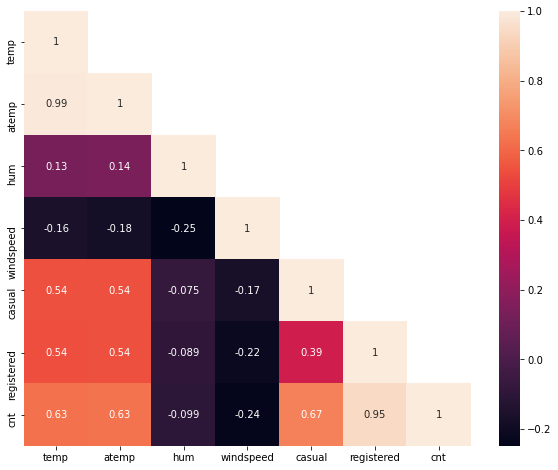

In [151]:
#Correlation heat map

plt.figure(figsize=(10,8))
mask =np.array(num_data.corr())
mask[np.tril_indices_from(mask)]=False 
sns.heatmap(num_data.corr(), mask=mask,annot=True)
plt.show()

In [152]:
#column with high correlation has droped

bike_data= bike_data.drop(['atemp'],axis=1)

In [153]:
# encoading 

dummy_data= pd.get_dummies(cat_data, drop_first=True)

In [154]:
#  concating bike data and dummies

bike_data = pd.concat([bike_data,dummy_data],axis=1)
bike_data.drop(cat_data.columns, axis=1,inplace=True)

In [155]:
bike_data.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [156]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   hum            730 non-null    float64       
 6   windspeed      730 non-null    float64       
 7   casual         730 non-null    int64         
 8   registered     730 non-null    int64         
 9   cnt            730 non-null    int64         
 10  season_spring  730 non-null    uint8         
 11  season_summer  730 non-null    uint8         
 12  season_winter  730 non-null    uint8         
 13  mnth_Aug       730 non-null    uint8         
 14  mnth_Dec       730 non-null    uint8         
 15  mnth_Feb       730 non-

In [157]:
bike_data.drop(['dteday'],axis=1,inplace=True)

In [158]:
#feature data (X) and target column (y)

X= bike_data.drop(['cnt'],axis=1)
y= bike_data['cnt']

# Model Building

In [159]:
#train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=100)

In [183]:
#sacling the data

scale_col = ['temp', 'hum', 'windspeed', 'casual','registered']
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train[scale_col]=scaler.fit_transform(X_train[scale_col])

In [186]:
#Gradient boosting 

from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [187]:
#score

model.score(X_train,y_train)

0.99902233796698